In [8]:
from TMSAnalysis.StruckAnalysisConfiguration import StruckAnalysisConfiguration
from TMSAnalysis.WaveformAnalysis import Waveform
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 15

In [9]:
run_parameters_file = '/g/g90/jacopod/software/TMSAnalysis/config/Run_Parameters_Xe_Run29_SimCompatible.csv'
calibrations_file = '/g/g90/jacopod/software/TMSAnalysis/config/Calibrations_Xe_Run11b.csv'
channel_map_file = '/g/g90/jacopod/software/TMSAnalysis/config/Channel_Map_Xe_Run29_MCIncluded.csv'

In [10]:
analysis_config = StruckAnalysisConfiguration.StruckAnalysisConfiguration()
analysis_config.GetRunParametersFromFile(run_parameters_file)
trigger_time  = analysis_config.run_parameters['Pretrigger Length [samples]']
sampling_rate = analysis_config.run_parameters['Simulation Sampling Rate [MHz]']

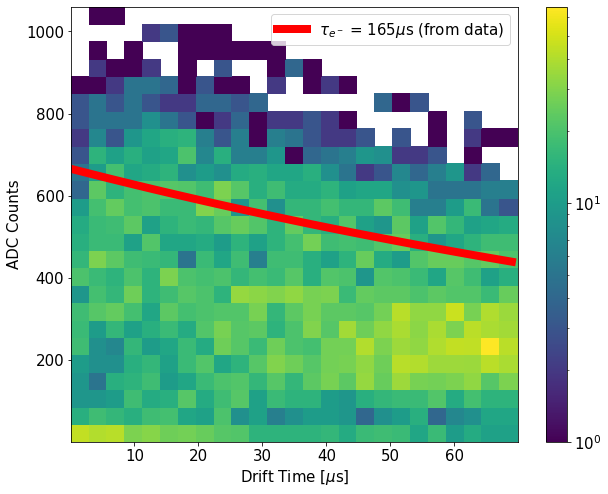

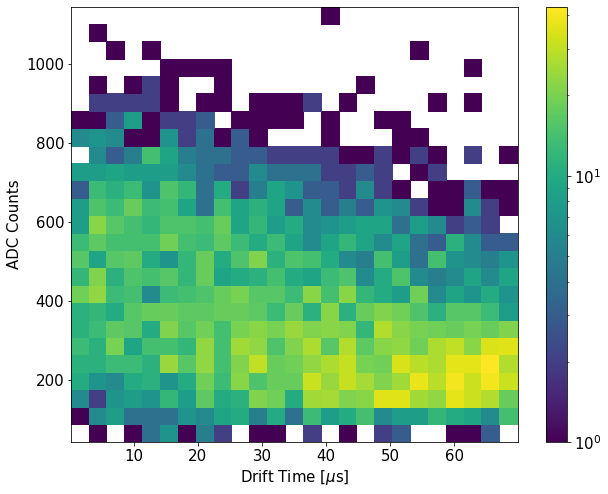

In [29]:
min_time = 0
max_time = 70
bins=25
fname = '/p/lustre1/jacopod/alpha_sim/no_noise_analysis_500ns/reduced_added.h5'
df = pd.read_hdf(fname)
DriftTime = df['TimeOfMaxChannel']/sampling_rate - trigger_time/analysis_config.run_parameters['Sampling Rate [MHz]']
mask = (df['TotalTileEnergy']<2000) & (DriftTime>min_time) & (DriftTime<max_time)
plt.hist2d(DriftTime[mask], df['TotalTileEnergy'][mask], bins=bins, norm=LogNorm())
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('ADC Counts')
plt.colorbar()
plt.plot(665.7*np.exp(-np.arange(70)/165.9),linewidth=8,color='red',label=r'$\tau_{e^-}$ = 165$\mu$s (from data)')
plt.legend()
plt.show()
fname1 = '/p/lustre1/jacopod/alpha_sim/analysis_500ns/reduced_added.h5'
df1 = pd.read_hdf(fname1)
DriftTime1 = df1['TimeOfMaxChannel']/sampling_rate - trigger_time/analysis_config.run_parameters['Sampling Rate [MHz]']
mask1 = (df1['TotalTileEnergy']<2000) & (DriftTime1>min_time) & (DriftTime1<max_time)
plt.hist2d(DriftTime1[mask1], df1['TotalTileEnergy'][mask1], bins=bins, norm=LogNorm())
plt.xlabel('Drift Time [$\mu$s]')
plt.ylabel('ADC Counts')
plt.colorbar()
plt.show()

In [5]:
def fit_function(x, A, beta, B, mu, sigma):
    return (A * np.exp(-x/beta) +\
            B * np.exp(-1.0 * (x - mu)**2 / (2 * sigma**2)))
def exp_function(x, A, beta):
    return(A * np.exp(-x/beta))

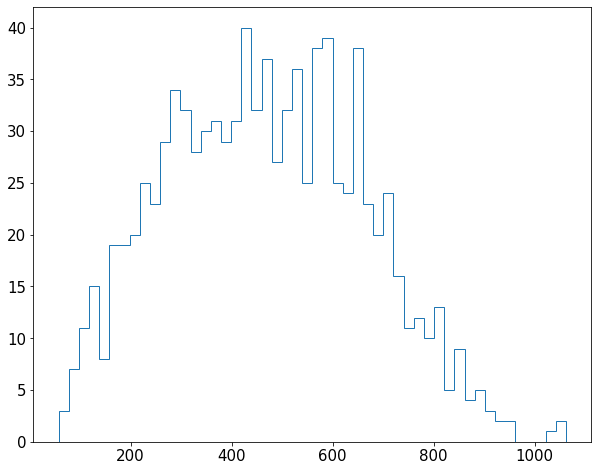

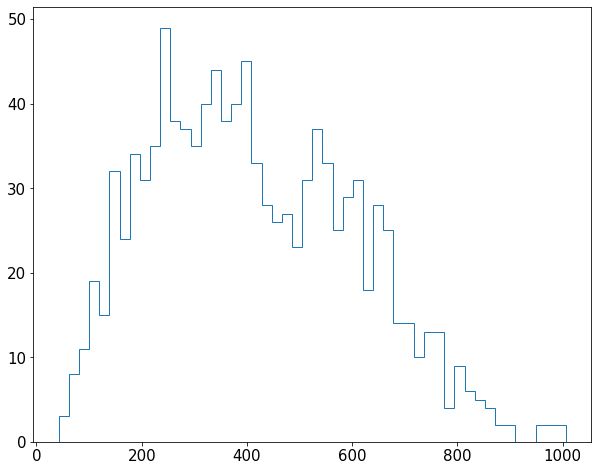

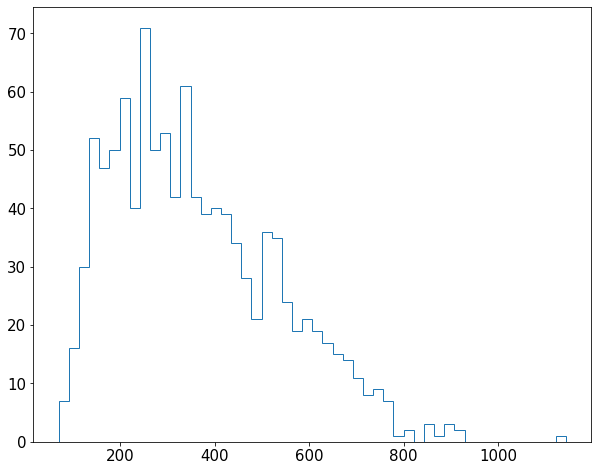

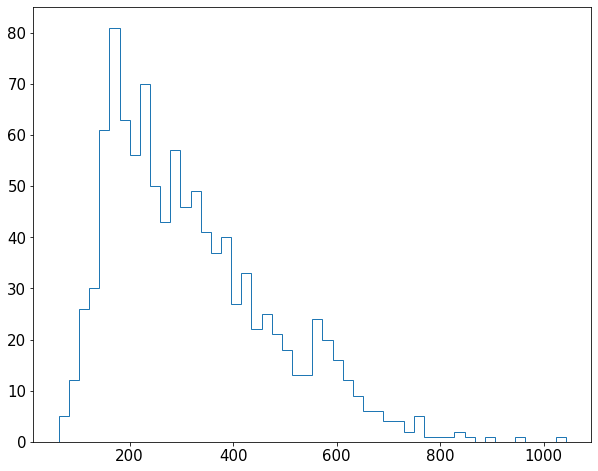

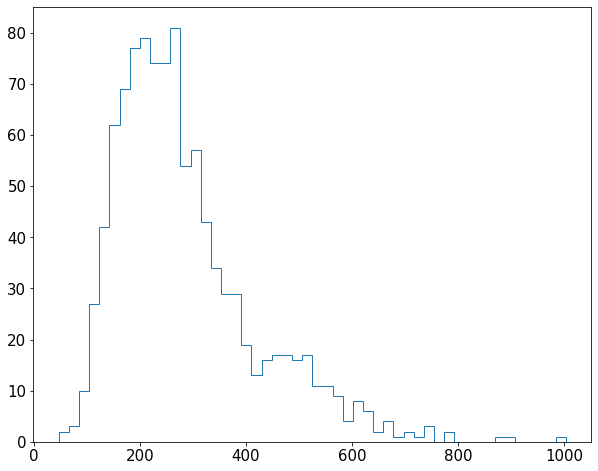

In [6]:
fit_data = {'time':[],'peak':[],'peak_error':[]}
p0 = ([None],[1000,800,150,500,40],[500,800,120,500,80],[300,800,60,500,40],[600,4000,60,400,40],[900,-8000,50,500,50])
slices = 6
for i,rg in enumerate(np.linspace(min_time,max_time,slices)):

    bins = 50
    fit_range = [300,1000]
    if i == 0:
        rg_0 = min_time
        continue
    bounds = (np.asarray(p0[i])*0.2,np.asarray(p0[i])*1.8)
    #if i == slices - 1:
    #    fit_range = [250,600]
    #if i  == 3:
    #    bins = 100
    #    fit_range = [250,1000]
    #if i == slices-1:
    #    mask1 = np.logical_and(mask1,df['NumTileChannelsHit']==1)
    #    fit_range = [350,550]
    #    bins = 80
    #    bounds[0][1] = p0[i][1]*1.8
    #   bounds[1][1] = p0[i][1]*0.2

    mask2 = (df1['TotalTileEnergy']>0) & (df1['TotalTileEnergy']<2000) & (DriftTime1>rg_0) & (DriftTime1<rg)
    data, bin_edges,_ = plt.hist(df1['TotalTileEnergy'][mask2],bins=bins,histtype='step')
    bin_width = bin_edges[1]-bin_edges[0]
    plt.show()
    #fit_idx = np.where((bin_edges>fit_range[0]) & (bin_edges<fit_range[1]))[0]
    #popt, pcov = curve_fit(fit_function, xdata=bin_edges[fit_idx], ydata=data[fit_idx],p0=p0[i],bounds=bounds)
    #fit_x_bin = np.linspace(bin_edges[fit_idx][0],bin_edges[fit_idx][-1],100)
    #plt.plot(fit_x_bin, fit_function(fit_x_bin, *popt), color='darkorange', linewidth=2.5, label=r'Fitted function')
    #popt_buffer = copy.deepcopy(popt)
    #for ix,j in zip((0,2),('green','red')):
    #    popt[ix] = 0
    #    plt.plot(fit_x_bin, fit_function(fit_x_bin, *popt), color=j, linewidth=1.5,linestyle='dashed')
    #    popt = copy.deepcopy(popt_buffer)
    #plt.text(0.5, 0.6, cut1.GetString('\n'), transform = plt.gca().transAxes)
    #plt.xlabel('ADC Counts')
    #plt.show()
    #fit_data['time'].append((rg + rg_0)/2)
    #fit_data['peak'].append(popt[3])
    #fit_data['peak_error'].append(np.sqrt(pcov[3,3]) + np.sqrt(popt[3]*bin_width/(popt[2]*np.sqrt(2*np.pi))))
    rg_0 = rg
    
#fit_data = pd.DataFrame(fit_data)

In [7]:
mask_diag = df['TotalTileEnergy']>1000-4.5*DriftTime
print(np.unique(df['Event'][mask_diag],return_counts=True))

(array([17., 28.]), array([ 1, 52]))


Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed008.root


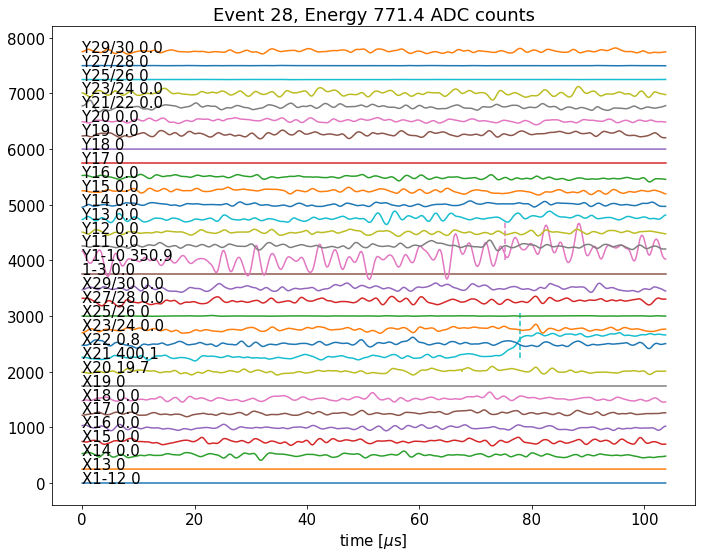

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed011.root


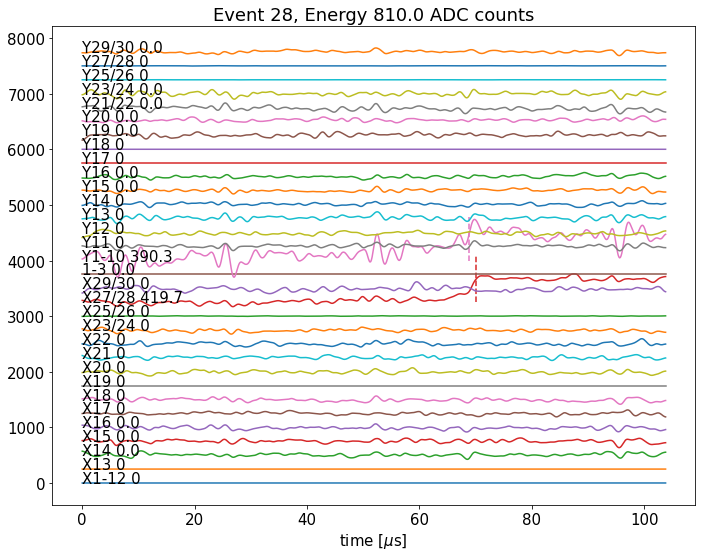

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed012.root


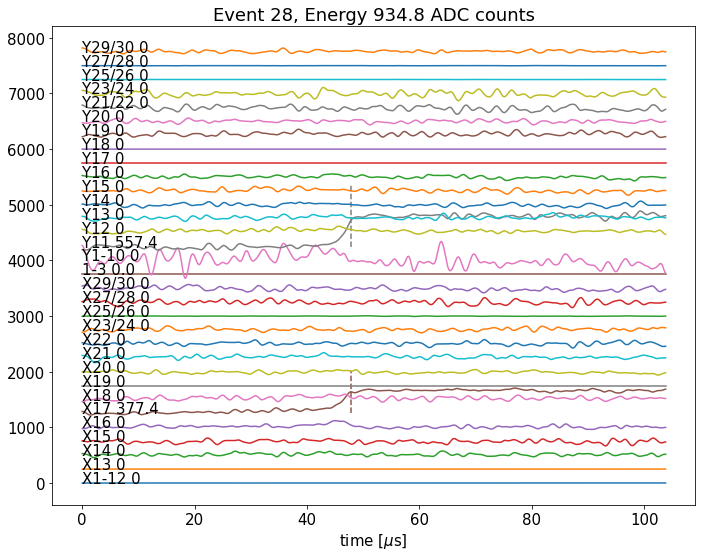

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed014.root


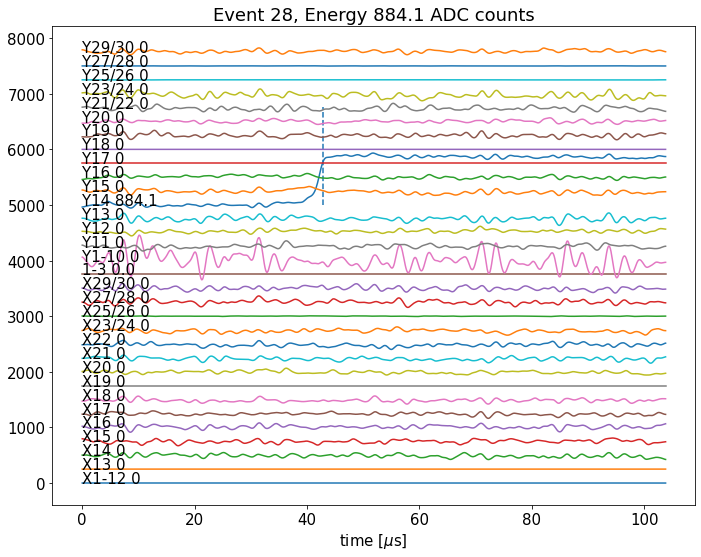

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed019.root


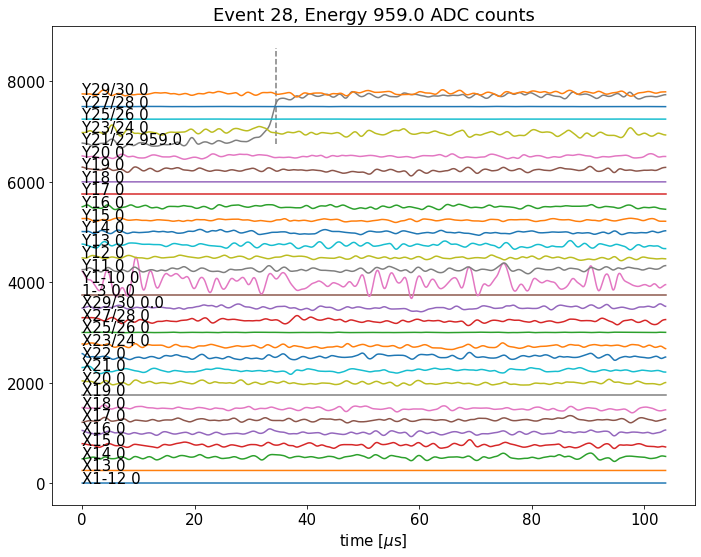

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed020.root


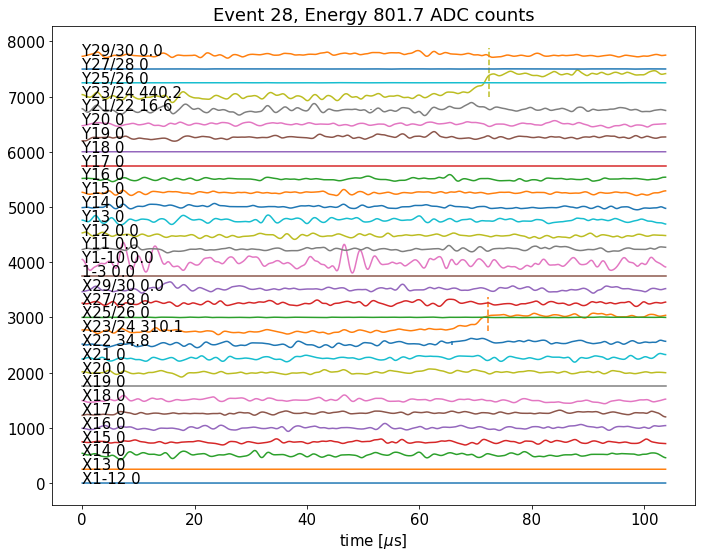

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed027.root


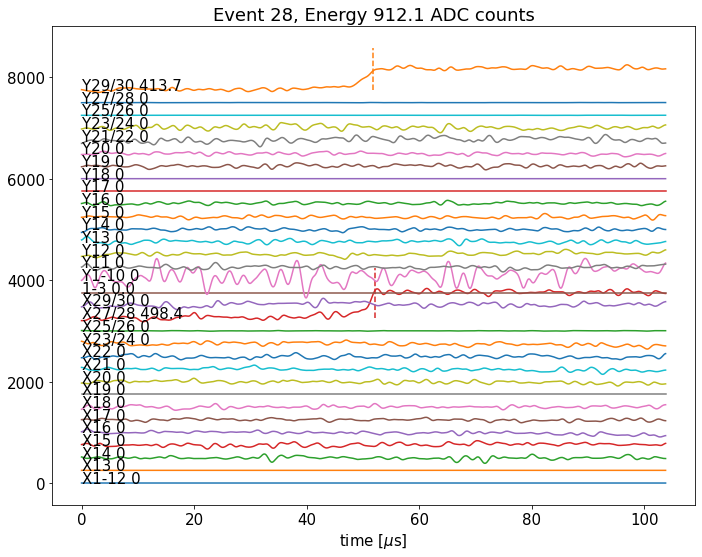

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed028.root


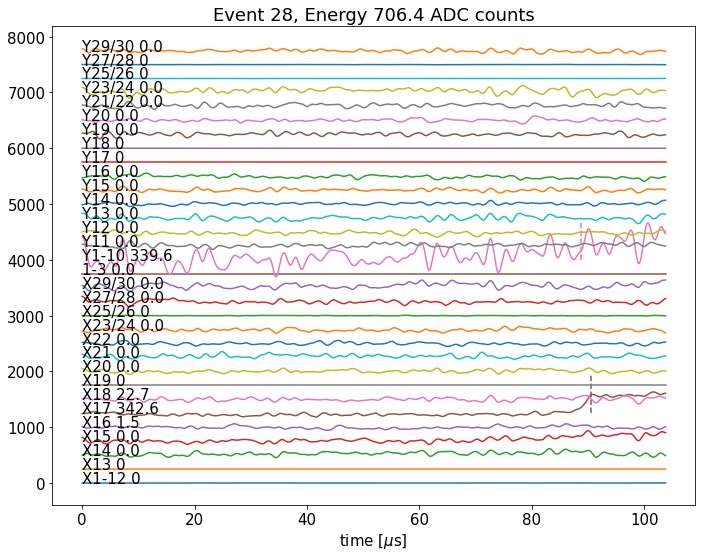

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed032.root


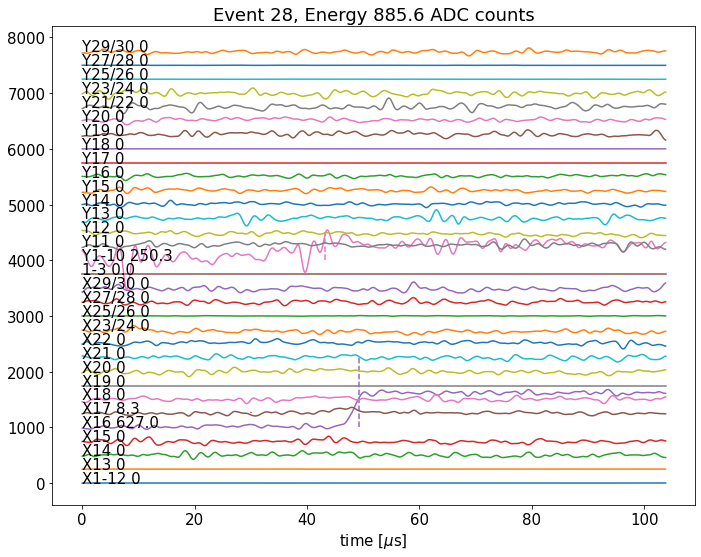

Finished loading.
28.0 batch_g4andcharge_500evts_alphas6207keVUniformActive_150usEL_0p128usSampling_seed033.root


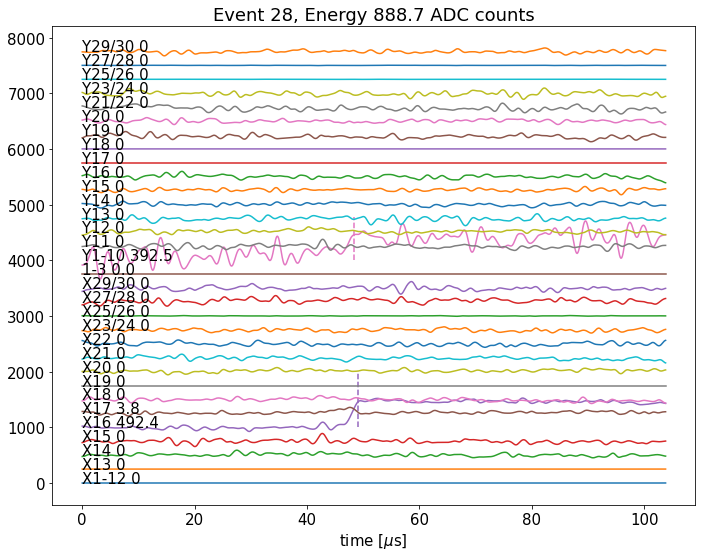

In [8]:
path = '/p/lustre1/jacopod/alpha_sim/raw_data'
for i in df[mask_diag].index[:10]:
    event = Waveform.Simulated_Event(fname,\
                                     path,\
                                     i,\
                                     run_parameters_file,\
                                     calibrations_file,\
                                     channel_map_file,\
                                     True)
    print(event.event_number,df['File'][i])
    event.smooth(0.5)
    plot = event.plot_event(risetime=True)
    plot.show()
    #event1 = Waveform.Simulated_Event(fname1,\
    #                                 path,\
    #                                 i,\
    #                                 run_parameters_file,\
    #                                calibrations_file,\
    #                                 channel_map_file,\
    #                                 False)
    #print(event1.event_number,df1['File'][i])
    #event1.smooth(0.5)
    #plot = event1.plot_event(risetime=True)
    #plot.show()

electron lifetime, alpha spectrum comparison charge resolution, waveform comparison

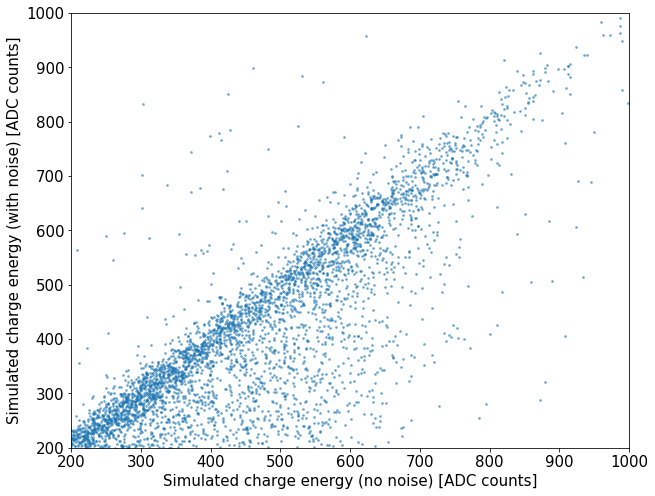

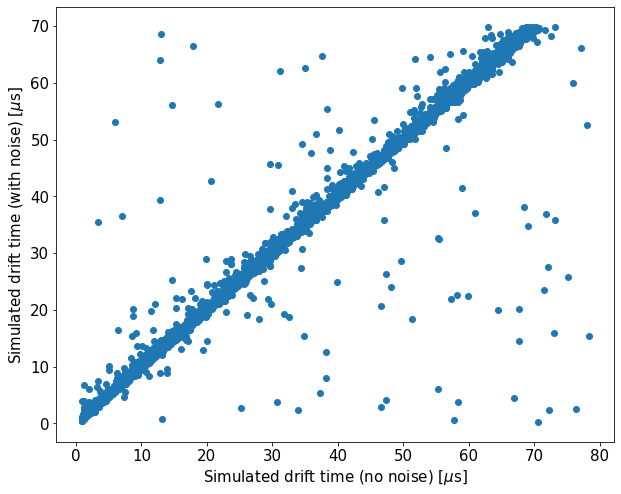

In [9]:
plt.scatter(df['TotalTileEnergy'][mask1],df1['TotalTileEnergy'][mask1],alpha=0.5,s=3)
plt.xlim(200,1000)
plt.ylim(200,1000)
plt.xlabel('Simulated charge energy (no noise) [ADC counts]')
plt.ylabel('Simulated charge energy (with noise) [ADC counts]')
plt.show()
plt.scatter(DriftTime[mask1],DriftTime1[mask1])
plt.xlabel('Simulated drift time (no noise) [$\mu$s]')
plt.ylabel('Simulated drift time (with noise) [$\mu$s]')
plt.show()